In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier 

In [2]:
df = pd.read_csv('vuelos_clean1.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,B6,CHS,124,636,324,323,448,...,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,B6,LAX,371,2475,340,333,531,...,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,B6,FLL,181,1069,301,341,482,...,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,B6,MCO,168,944,345,343,513,...,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,DL,ATL,139,760,360,356,499,...,58,W,24,35,29.91,Fair / Windy,9,17,13,0


### Multicolinealidad

In [ ]:
# vemos la correlacion que existe entre nuestras columnas para poder usarlas.

/var/folders/bg/4d0w7gdx0578w94pqg4phn080000gn/T/ipykernel_5096/2840840165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest", linewidths=1)


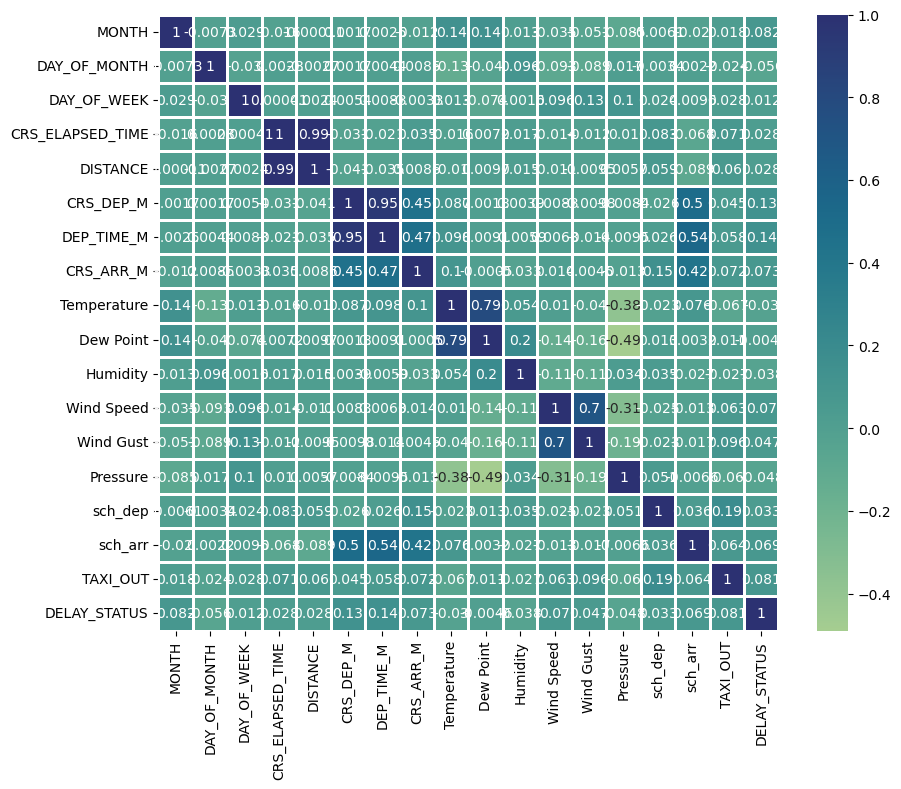

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="crest", linewidths=1)
plt.show()

##### ALTAMENTE correlacionados:
###### -CRS_DEP_M. Y DEP_TIME_M  .95
###### -DISTANCE Y CRS_ELASPSED_TIME .99
###### -DEW_POINT Y Temperature .79
###### -wind gust y wind speed .7

In [4]:
#PODEMOS VER QUE CRS_DEP_M Y DEP_TIME AMBOS SE REFIEREN AL TIEMPO DE SALIDA U HORA.
#asi que eliminaremos la columna crs_dep_m 
df.drop(['CRS_DEP_M'] , inplace =True , axis=1) 
df


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,B6,CHS,124,636,323,448,48,...,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,B6,LAX,371,2475,333,531,48,...,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,B6,FLL,181,1069,341,482,48,...,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,B6,MCO,168,944,343,513,48,...,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,DL,ATL,139,760,356,499,46,...,58,W,24,35,29.91,Fair / Windy,9,17,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,B6,ORH,57,150,1372,1427,39,...,96,N,6,0,30.18,Cloudy,20,32,19,1
28814,1,31,5,AA,BOS,75,187,1392,25,39,...,96,N,6,0,30.18,Cloudy,19,23,22,1
28815,1,31,5,AS,SEA,392,2422,1408,1337,39,...,96,N,6,0,30.18,Cloudy,19,23,21,1
28816,1,31,5,B6,SJU,224,1598,1422,261,39,...,96,N,6,0,30.18,Cloudy,19,23,13,1


## VIF

In [10]:
#seguimos viendo si estan altamente relacionados.

df.select_dtypes(np.number).columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT',
       'DELAY_STATUS'],
      dtype='object')

In [11]:
features = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ELAPSED_TIME', 'DISTANCE'
            , 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr',
       'TAXI_OUT']

In [12]:
def calculate_vif(df, features):    
    vif, tolerance, r2sq = {}, {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        r2sq[feature] = r2
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance, 'R2': r2sq})

In [13]:
calculate_vif(df,features)  # observamos que CRS_ELAPSED_TIME y DISTANCE  son las mas altas de nuevo.

,VIF,Tolerance,R2
MONTH,1.051119,0.951367,0.048633
DAY_OF_MONTH,1.048905,0.953375,0.046625
DAY_OF_WEEK,1.049843,0.952524,0.047476
CRS_ELAPSED_TIME,106.490190,0.009391,0.990609
DISTANCE,106.155767,0.009420,0.990580
DEP_TIME_M,1.591211,0.628452,0.371548
CRS_ARR_M,1.456859,0.686408,0.313592
Temperature,3.173260,0.315133,0.684867
Dew Point,4.021816,0.248644,0.751356
Humidity,1.108036,0.902498,0.097502


In [14]:
#ahora llamare de nuevo mis features pero sin CRS_ELAPSED_TIME ya que tiene una alta coliniaridad.
features_2= ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE'
            , 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr',
       'TAXI_OUT']
calculate_vif(df,features_2)

,VIF,Tolerance,R2
MONTH,1.027987,0.972775,0.027225
DAY_OF_MONTH,1.047288,0.954848,0.045152
DAY_OF_WEEK,1.049627,0.952719,0.047281
DISTANCE,1.017422,0.982876,0.017124
DEP_TIME_M,1.589871,0.628982,0.371018
CRS_ARR_M,1.411735,0.708348,0.291652
Temperature,3.154744,0.316983,0.683017
Dew Point,4.008681,0.249459,0.750541
Humidity,1.107953,0.902565,0.097435
Wind Speed,2.272296,0.440084,0.559916


In [15]:
df_2 = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE'
            , 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr',
       'TAXI_OUT']]
df_2

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,636,323,448,48,34,58,25,38,29.86,9,17,14
1,11,1,5,2475,333,531,48,34,58,25,38,29.86,9,17,15
2,11,1,5,1069,341,482,48,34,58,25,38,29.86,9,17,22
3,11,1,5,944,343,513,48,34,58,25,38,29.86,9,17,12
4,11,1,5,760,356,499,46,32,58,24,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,150,1372,1427,39,38,96,6,0,30.18,20,32,19
28814,1,31,5,187,1392,25,39,38,96,6,0,30.18,19,23,22
28815,1,31,5,2422,1408,1337,39,38,96,6,0,30.18,19,23,21
28816,1,31,5,1598,1422,261,39,38,96,6,0,30.18,19,23,13


In [16]:
categoricals = df.select_dtypes(np.object)
categoricals

/var/folders/bg/4d0w7gdx0578w94pqg4phn080000gn/T/ipykernel_5096/983254351.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(np.object)


,OP_UNIQUE_CARRIER,DEST,Wind,Condition
0,B6,CHS,W,Fair / Windy
1,B6,LAX,W,Fair / Windy
2,B6,FLL,W,Fair / Windy
3,B6,MCO,W,Fair / Windy
4,DL,ATL,W,Fair / Windy
...,...,...,...,...
28813,B6,ORH,N,Cloudy
28814,AA,BOS,N,Cloudy
28815,AS,SEA,N,Cloudy
28816,B6,SJU,N,Cloudy


In [17]:
categoricals['DEST'].value_counts()

LAX    2974
SFO    1678
BOS    1243
FLL    1007
MCO     947
       ... 
ABQ      58
PHL      48
RNO      47
EGE      44
JAC       5
Name: DEST, Length: 65, dtype: int64

### Chi-square Test

In [18]:
#vamos a checar 	OP_UNIQUE_CARRIER y DEST
data_crosstab = pd.crosstab(df['OP_UNIQUE_CARRIER'] , df['DEST'])
data_crosstab

DEST,ABQ,ATL,AUS,BNA,BOS,BQN,BTV,BUF,BUR,BWI,...,SEA,SFO,SJC,SJU,SLC,SMF,SRQ,STT,SYR,TPA
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,
9E,0,0,0,115,229,0,208,266,0,299,...,0,0,0,0,0,0,0,0,198,0
AA,0,0,110,0,200,0,0,0,0,0,...,0,339,0,0,0,0,0,13,0,0
AS,0,0,0,0,0,0,0,0,0,0,...,245,313,58,0,0,0,0,0,0,0
B6,58,175,152,0,463,123,273,501,134,0,...,138,493,65,504,170,82,89,0,177,337
DL,0,620,223,0,217,0,0,0,0,0,...,291,533,69,292,389,0,3,49,0,327
HA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MQ,0,0,0,163,0,0,0,0,0,84,...,0,0,0,0,0,0,0,0,0,0
OO,0,0,0,88,0,0,0,73,0,0,...,0,0,0,0,0,0,0,0,0,0
YX,0,0,0,0,134,0,0,29,0,0,...,0,0,0,0,0,0,13,0,14,0


In [19]:
chi = chi2_contingency(data_crosstab)

In [32]:
chi

(86749.17227294012,
 0.0,
 512,
 array([[9.02463738e+00, 1.23699771e+02, 7.54646402e+01, 5.69485738e+01,
         1.93407315e+02, 1.91384551e+01, 7.48422514e+01, 1.35213963e+02,
         2.08500243e+01, 5.95937261e+01, 5.80377542e+01, 4.93243112e+01,
         1.23232979e+02, 4.82351308e+01, 3.08082448e+01, 8.83792074e+01,
         4.09220626e+01, 5.92825318e+01, 5.29030467e+01, 6.84627663e+00,
         1.56686377e+02, 1.58709140e+01, 4.37228121e+01, 3.98328822e+01,
         4.13888542e+01, 7.77985981e-01, 7.63982233e+01, 1.15608717e+02,
         4.62746061e+02, 2.55179402e+01, 1.47350545e+02, 1.37081130e+02,
         5.10358804e+01, 6.14608925e+01, 9.49142897e+00, 1.22921785e+01,
         9.49142897e+01, 6.28612673e+01, 1.40037477e+01, 7.59314317e+01,
         4.04552710e+01, 7.46866542e+00, 1.04250121e+02, 5.36810327e+01,
         1.21365813e+01, 1.01138178e+01, 2.69183149e+01, 1.18565064e+02,
         5.15026719e+01, 7.31306822e+00, 7.99769588e+01, 4.74571448e+01,
         6.48840308

In [20]:
# con base en la tabla rechazamos nuestra hipotesis nula que asume que no hay asociacion entre ellas. 
#por lo que eliminaremos una de ellas.
#Estadistico : 86749.17227294012
# p valeu : 0.0
# grados de libertad: 512

df.drop('OP_UNIQUE_CARRIER', axis =1 , inplace=True)
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,CHS,124,636,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,LAX,371,2475,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,FLL,181,1069,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,MCO,168,944,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,ATL,139,760,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,ORH,57,150,1372,1427,39,38,96,N,6,0,30.18,Cloudy,20,32,19,1
28814,1,31,5,BOS,75,187,1392,25,39,38,96,N,6,0,30.18,Cloudy,19,23,22,1
28815,1,31,5,SEA,392,2422,1408,1337,39,38,96,N,6,0,30.18,Cloudy,19,23,21,1
28816,1,31,5,SJU,224,1598,1422,261,39,38,96,N,6,0,30.18,Cloudy,19,23,13,1


In [37]:
#Observaremos WIND y Condition ...
data_crosstab = pd.crosstab(df['Wind'] , df['Condition'])
data_crosstab

Condition,Cloudy,Cloudy / Windy,Drizzle and Fog,Fair,Fair / Windy,Fog,Fog / Windy,Heavy Rain,Heavy Rain / Windy,Light Drizzle,...,Light Snow / Windy,Mostly Cloudy,Mostly Cloudy / Windy,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Snow,Wintry Mix,Wintry Mix / Windy
Wind,,,,,,,,,,,,,,,,,,,,,
CALM,165,0,0,100,0,0,0,0,0,7,...,0,283,0,196,0,0,0,0,0,0
E,367,0,5,50,0,11,0,0,6,21,...,0,261,0,47,0,28,15,0,31,0
ENE,314,5,0,93,0,7,0,14,0,24,...,0,276,0,46,0,61,10,0,11,0
ESE,206,0,0,0,0,33,0,1,0,20,...,0,180,0,0,0,11,0,0,0,0
N,222,0,0,582,13,10,0,0,0,15,...,3,994,19,319,0,24,0,0,12,4
NE,92,52,0,56,62,0,0,2,0,28,...,1,326,9,104,0,108,0,0,21,0
NNE,298,91,0,251,0,12,0,0,0,24,...,0,359,18,69,0,64,0,0,3,0
NNW,357,17,0,783,323,0,0,0,0,0,...,7,456,108,203,54,0,0,0,5,0
NW,133,58,0,759,195,0,0,0,0,0,...,12,774,470,347,225,0,0,0,0,0


In [38]:
chi2_contingency(data_crosstab)

(16197.60755304464,
 0.0,
 408,
 array([[1.44642932e+02, 9.88045666e+00, 1.44874731e-01, 1.45975779e+02,
         2.65990006e+01, 4.25931709e+00, 8.11298494e-01, 1.56464710e+00,
         1.73849677e-01, 5.62113957e+00, 5.21549032e-01, 1.15899785e-01,
         5.40382747e+01, 8.34478451e+00, 2.20209591e+00, 6.95398709e-01,
         2.64309459e+02, 4.17818724e+01, 9.29806024e+01, 1.68634187e+01,
         1.01702061e+01, 7.24373655e-01, 5.79498924e-02, 2.40492054e+00,
         1.15899785e-01],
        [1.85004372e+02, 1.26375182e+01, 1.85300854e-01, 1.86709140e+02,
         3.40212367e+01, 5.44784510e+00, 1.03768478e+00, 2.00124922e+00,
         2.22361024e-01, 7.18967312e+00, 6.67083073e-01, 1.48240683e-01,
         6.91172184e+01, 1.06733292e+01, 2.81657298e+00, 8.89444097e-01,
         3.38062877e+02, 5.34407662e+01, 1.18926088e+02, 2.15690194e+01,
         1.30081199e+01, 9.26504268e-01, 7.41203415e-02, 3.07599417e+00,
         1.48240683e-01],
        [1.94704976e+02, 1.33001596e+01,

In [21]:
## estadistico: 16197.60755304464
# pvalue : 0.0
#grados de libertad : 408

#DE IGUAL FORMA RECHAZAMOS NUESTRA HIPOTESIS NULA QUE DICE QUE NO HYA RELACION ENTRE ELLAS. POR LO QUE ELIMINAREMOS UNA DE ELLAS.
  
df.drop('Wind', axis =1 , inplace=True)
df    

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,CHS,124,636,323,448,48,34,58,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,LAX,371,2475,333,531,48,34,58,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,FLL,181,1069,341,482,48,34,58,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,MCO,168,944,343,513,48,34,58,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,ATL,139,760,356,499,46,32,58,24,35,29.91,Fair / Windy,9,17,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,ORH,57,150,1372,1427,39,38,96,6,0,30.18,Cloudy,20,32,19,1
28814,1,31,5,BOS,75,187,1392,25,39,38,96,6,0,30.18,Cloudy,19,23,22,1
28815,1,31,5,SEA,392,2422,1408,1337,39,38,96,6,0,30.18,Cloudy,19,23,21,1
28816,1,31,5,SJU,224,1598,1422,261,39,38,96,6,0,30.18,Cloudy,19,23,13,1


In [35]:
X_cat = df.select_dtypes(exclude=np.number)
X_cat

,DEST,Condition
0,CHS,Fair / Windy
1,LAX,Fair / Windy
2,FLL,Fair / Windy
3,MCO,Fair / Windy
4,ATL,Fair / Windy
...,...,...
28813,ORH,Cloudy
28814,BOS,Cloudy
28815,SEA,Cloudy
28816,SJU,Cloudy


In [24]:
## Guardamos nuestro csv ya limpio en su totalidad.

df.to_csv('vuelos_clean_total.csv', index = False)

# Numerical variables: StandardScaler, Min-max Scaler, Normalization

In [25]:
x_num = df.select_dtypes(np.number)
x_num

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,124,636,323,448,48,34,58,25,38,29.86,9,17,14,0
1,11,1,5,371,2475,333,531,48,34,58,25,38,29.86,9,17,15,0
2,11,1,5,181,1069,341,482,48,34,58,25,38,29.86,9,17,22,1
3,11,1,5,168,944,343,513,48,34,58,25,38,29.86,9,17,12,0
4,11,1,5,139,760,356,499,46,32,58,24,35,29.91,9,17,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,57,150,1372,1427,39,38,96,6,0,30.18,20,32,19,1
28814,1,31,5,75,187,1392,25,39,38,96,6,0,30.18,19,23,22,1
28815,1,31,5,392,2422,1408,1337,39,38,96,6,0,30.18,19,23,21,1
28816,1,31,5,224,1598,1422,261,39,38,96,6,0,30.18,19,23,13,1


In [26]:
x_num.drop('DELAY_STATUS' , axis =1 , inplace=True)
x_num

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,124,636,323,448,48,34,58,25,38,29.86,9,17,14
1,11,1,5,371,2475,333,531,48,34,58,25,38,29.86,9,17,15
2,11,1,5,181,1069,341,482,48,34,58,25,38,29.86,9,17,22
3,11,1,5,168,944,343,513,48,34,58,25,38,29.86,9,17,12
4,11,1,5,139,760,356,499,46,32,58,24,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,57,150,1372,1427,39,38,96,6,0,30.18,20,32,19
28814,1,31,5,75,187,1392,25,39,38,96,6,0,30.18,19,23,22
28815,1,31,5,392,2422,1408,1337,39,38,96,6,0,30.18,19,23,21
28816,1,31,5,224,1598,1422,261,39,38,96,6,0,30.18,19,23,13


In [27]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x_num)
x_standardized = transformer.transform(x_num)
x_standardized

array([[ 0.62224283, -1.71661503,  0.49920157, ..., -2.32298659,
        -1.38347776, -1.00104076],
       [ 0.62224283, -1.71661503,  0.49920157, ..., -2.32298659,
        -1.38347776, -0.85505702],
       [ 0.62224283, -1.71661503,  0.49920157, ..., -2.32298659,
        -1.38347776,  0.16682915],
       ...,
       [-1.38108571,  1.7118404 ,  0.49920157, ..., -1.27147873,
        -0.65735792,  0.02084541],
       [-1.38108571,  1.7118404 ,  0.49920157, ..., -1.27147873,
        -0.65735792, -1.1470245 ],
       [-1.38108571,  1.7118404 ,  0.49920157, ..., -1.27147873,
        -0.65735792, -0.85505702]])

In [28]:
x_standardized = pd.DataFrame(x_standardized, columns = x_num.columns)
x_standardized

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,0.622243,-1.716615,0.499202,-0.847784,-0.710402,-1.654133,-1.340285,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.001041
1,0.622243,-1.716615,0.499202,1.219484,1.357427,-1.621436,-1.099959,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-0.855057
2,0.622243,-1.716615,0.499202,-0.370722,-0.223523,-1.595279,-1.241838,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,0.166829
3,0.622243,-1.716615,0.499202,-0.479526,-0.364077,-1.588739,-1.152078,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.293008
4,0.622243,-1.716615,0.499202,-0.722242,-0.570972,-1.546233,-1.192615,0.560651,0.128137,0.011385,1.858498,2.478788,-0.615933,-2.322987,-1.383478,-1.147024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,-1.381086,1.711840,0.499202,-1.408541,-1.256875,1.775772,1.494401,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.166328,0.431822,-0.271122
28814,-1.381086,1.711840,0.499202,-1.257890,-1.215271,1.841166,-2.565078,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.166829
28815,-1.381086,1.711840,0.499202,1.395244,1.297832,1.893481,1.233806,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.020845
28816,-1.381086,1.711840,0.499202,-0.010833,0.371301,1.939257,-1.881742,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,-1.147024


In [29]:
# Min-max scaler

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x_num)
x_min_max = transformer.transform(x_num)
x_min_max = pd.DataFrame(x_min_max, columns = x_num.columns)
x_min_max

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,0.909091,0.0,0.666667,0.104688,0.110861,0.223767,0.310848,0.607843,0.528571,0.597938,0.694444,0.775510,0.425806,0.163636,0.369565,0.250000
1,0.909091,0.0,0.666667,0.490625,0.487012,0.230716,0.368567,0.607843,0.528571,0.597938,0.694444,0.775510,0.425806,0.163636,0.369565,0.277778
2,0.909091,0.0,0.666667,0.193750,0.199427,0.236275,0.334492,0.607843,0.528571,0.597938,0.694444,0.775510,0.425806,0.163636,0.369565,0.472222
3,0.909091,0.0,0.666667,0.173438,0.173860,0.237665,0.356050,0.607843,0.528571,0.597938,0.694444,0.775510,0.425806,0.163636,0.369565,0.194444
4,0.909091,0.0,0.666667,0.128125,0.136224,0.246699,0.346314,0.568627,0.500000,0.597938,0.666667,0.714286,0.458065,0.163636,0.369565,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,0.000000,1.0,0.666667,0.000000,0.011454,0.952745,0.991655,0.431373,0.585714,0.989691,0.166667,0.000000,0.632258,0.363636,0.695652,0.388889
28814,0.000000,1.0,0.666667,0.028125,0.019022,0.966644,0.016690,0.431373,0.585714,0.989691,0.166667,0.000000,0.632258,0.345455,0.500000,0.472222
28815,0.000000,1.0,0.666667,0.523438,0.476171,0.977762,0.929068,0.431373,0.585714,0.989691,0.166667,0.000000,0.632258,0.345455,0.500000,0.444444
28816,0.000000,1.0,0.666667,0.260938,0.307629,0.987491,0.180807,0.431373,0.585714,0.989691,0.166667,0.000000,0.632258,0.345455,0.500000,0.222222


In [31]:
# Normalization

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
x_normalized = pd.DataFrame(x_normalized, columns = x_num.columns)
x_normalized

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,0.012827,0.001166,0.005831,0.144597,0.741642,0.376652,0.522415,0.055973,0.039648,0.067634,0.029153,0.044312,0.034820,0.010495,0.019824,0.016325
1,0.004260,0.000387,0.001936,0.143688,0.958565,0.128971,0.205656,0.018590,0.013168,0.022463,0.009682,0.014717,0.011565,0.003486,0.006584,0.005809
2,0.008879,0.000807,0.004036,0.146095,0.862851,0.275241,0.389050,0.038744,0.027443,0.046815,0.020179,0.030672,0.024102,0.007264,0.013722,0.017757
3,0.009608,0.000873,0.004367,0.146747,0.824580,0.299609,0.448104,0.041928,0.029699,0.050663,0.021837,0.033193,0.026083,0.007861,0.014849,0.010482
4,0.011097,0.001009,0.005044,0.140229,0.766722,0.359149,0.503413,0.046407,0.032283,0.058513,0.024212,0.035310,0.030175,0.009080,0.017150,0.013115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,0.000502,0.015577,0.002512,0.028642,0.075374,0.689424,0.717062,0.019597,0.019095,0.048240,0.003015,0.000000,0.015165,0.010050,0.016080,0.009547
28814,0.000708,0.021951,0.003541,0.053108,0.132415,0.985681,0.017703,0.027616,0.026908,0.067978,0.004249,0.000000,0.021371,0.013454,0.016286,0.015578
28815,0.000319,0.009900,0.001597,0.125186,0.773473,0.449649,0.426975,0.012455,0.012135,0.030658,0.001916,0.000000,0.009638,0.006068,0.007345,0.006706
28816,0.000461,0.014285,0.002304,0.103223,0.736385,0.655282,0.120273,0.017972,0.017511,0.044238,0.002765,0.000000,0.013907,0.008756,0.010599,0.005991


In [33]:
#Let's check income
dfs = [x_num, x_standardized, x_min_max, x_normalized] #mis dataFrame
cols = x_num.columns 

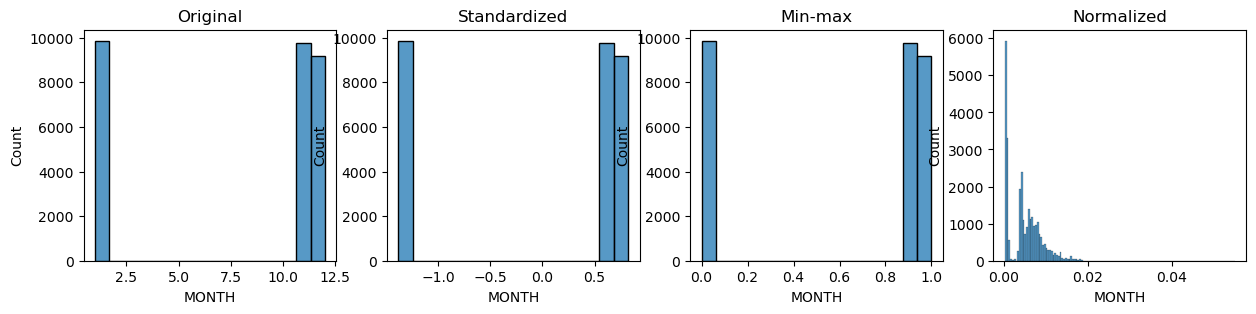

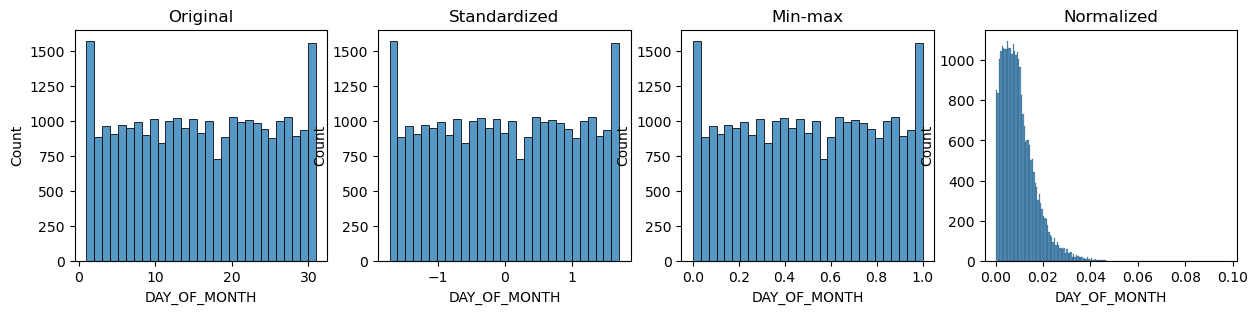

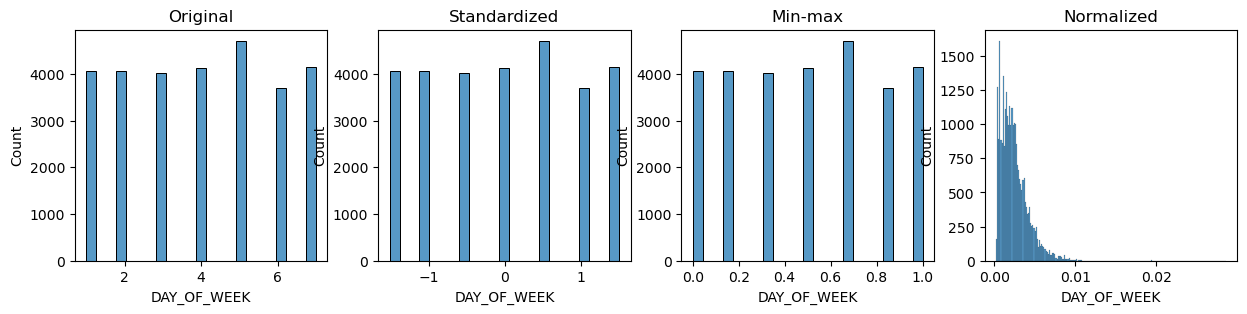

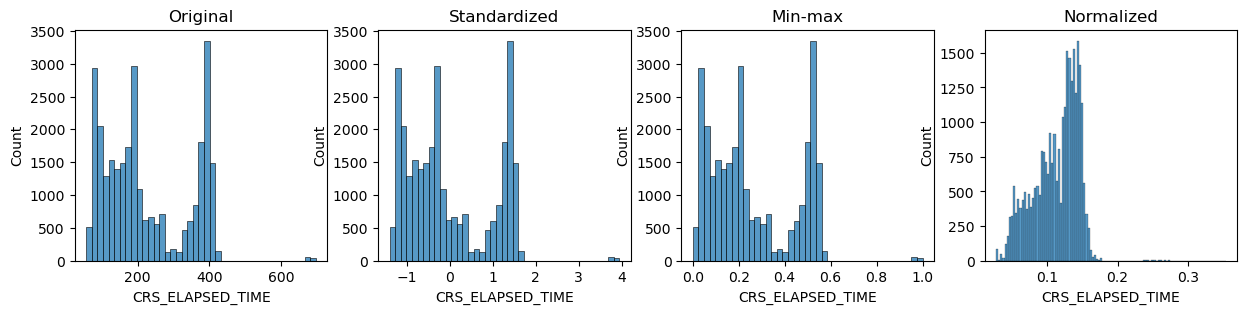

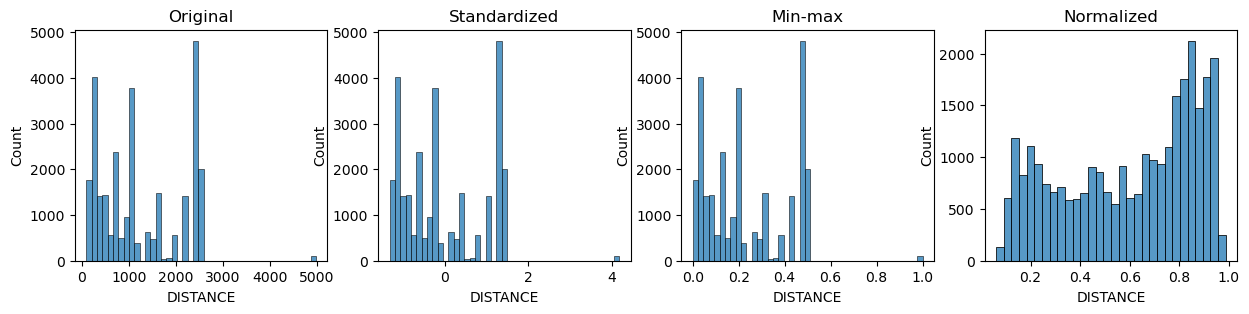

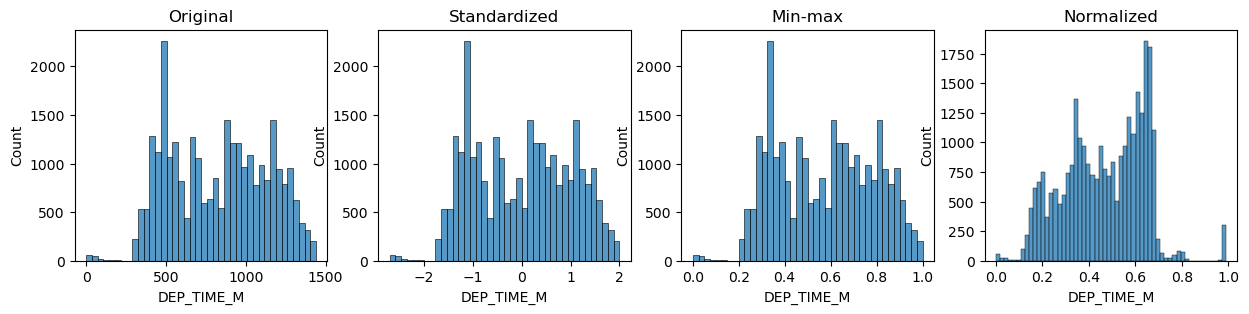

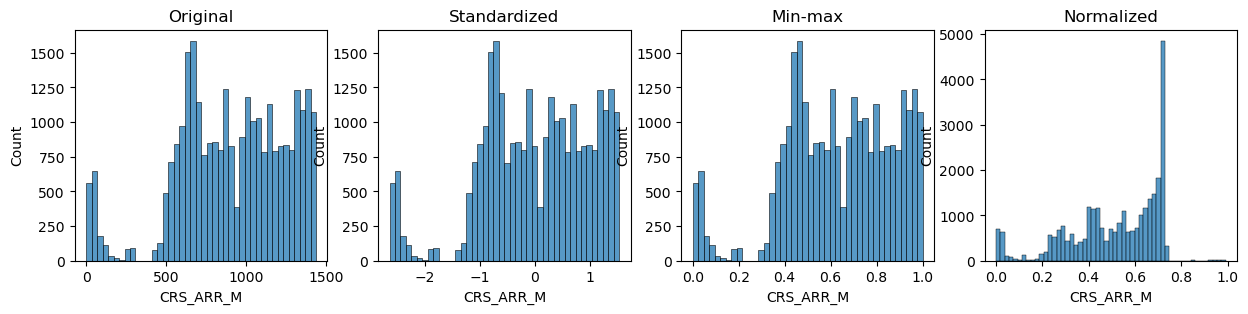

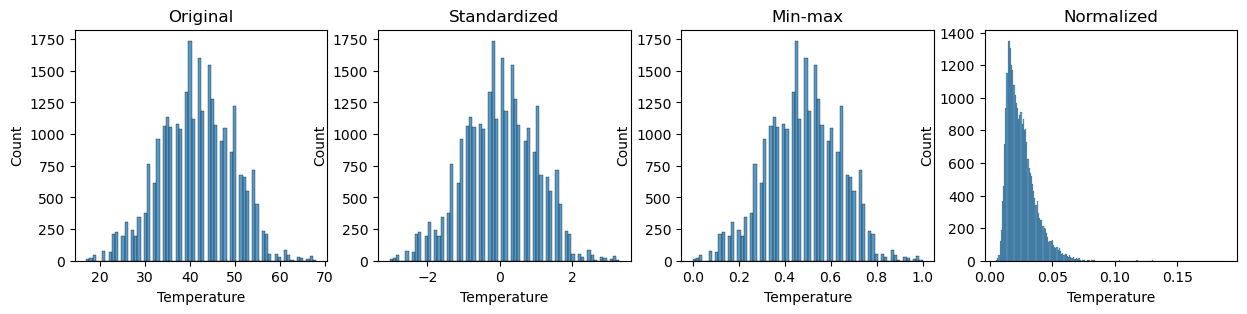

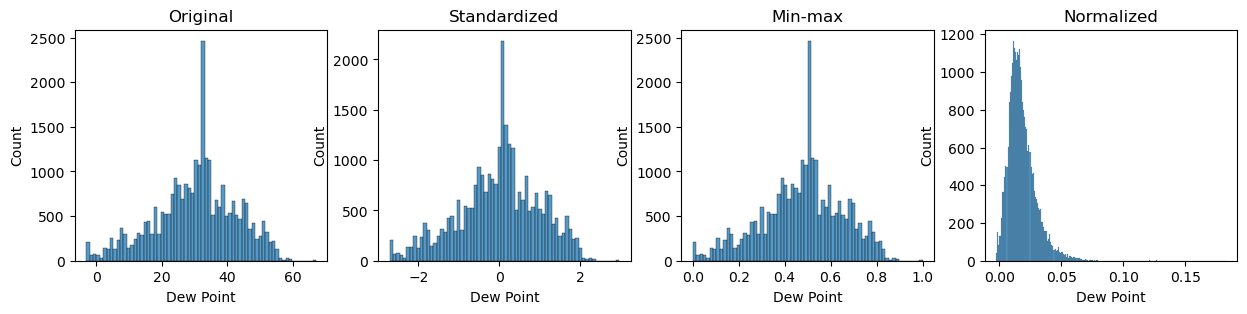

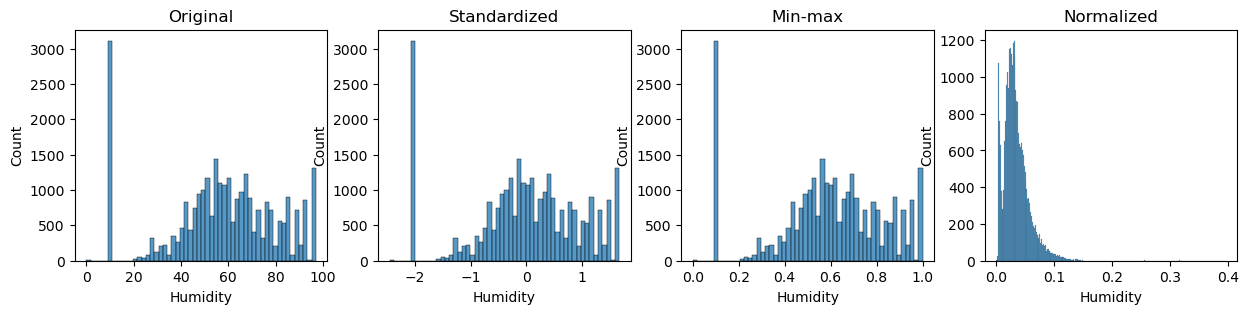

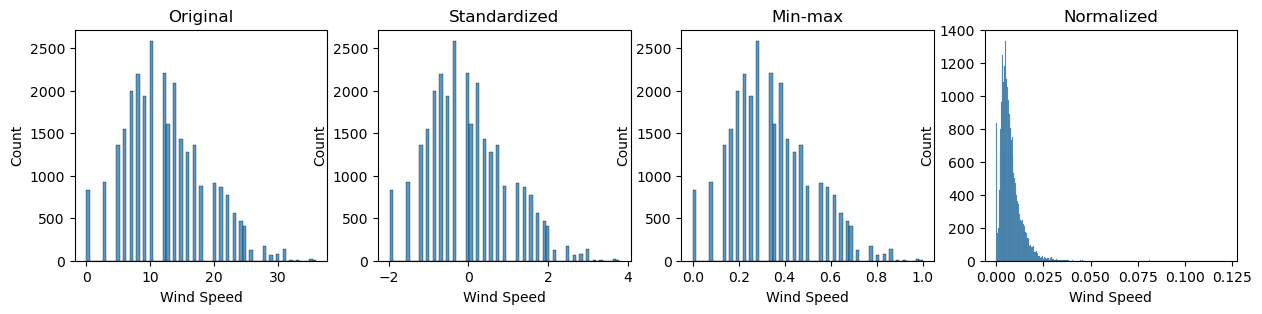

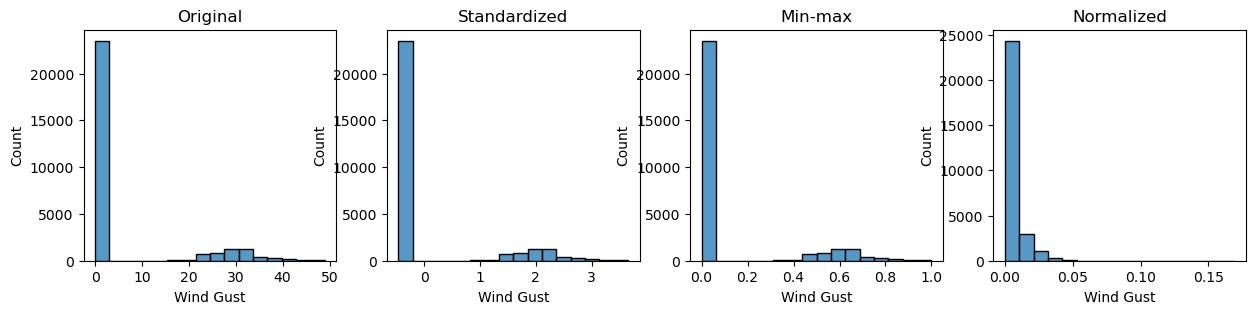

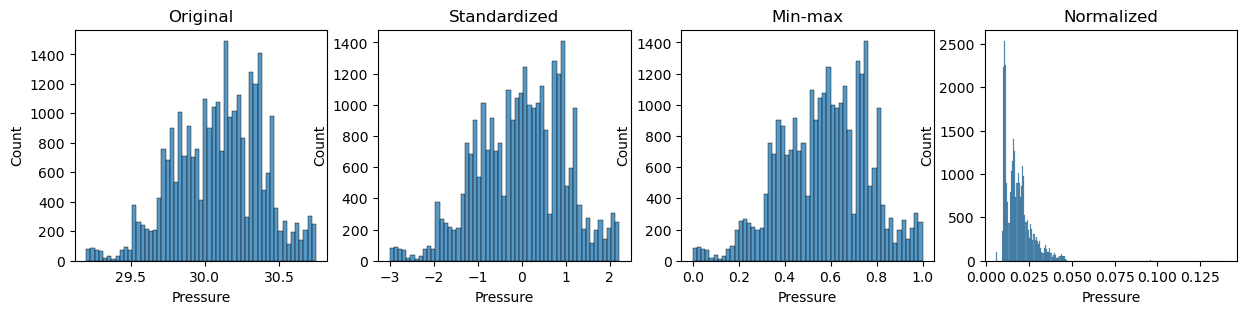

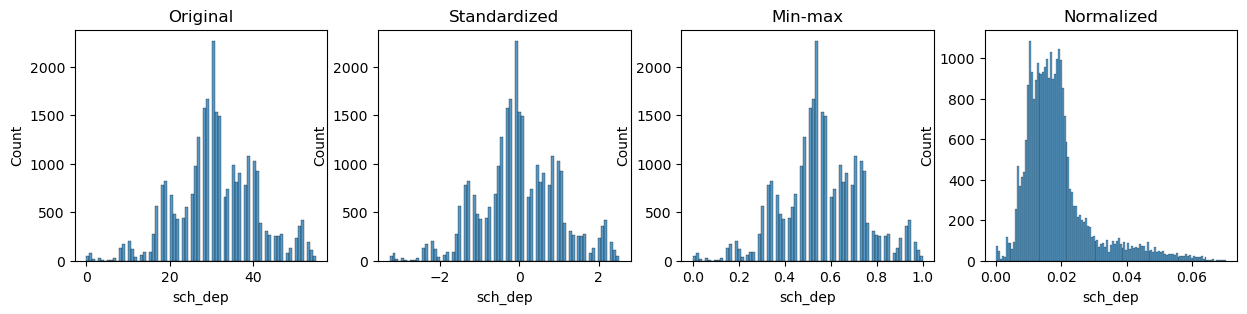

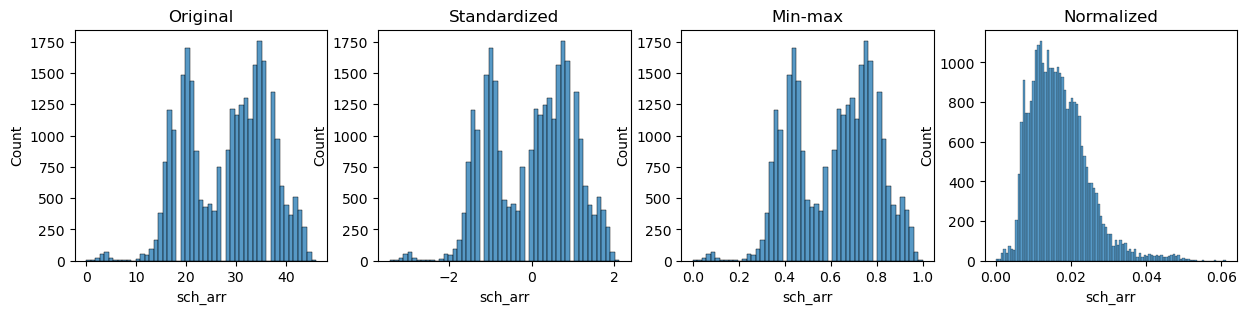

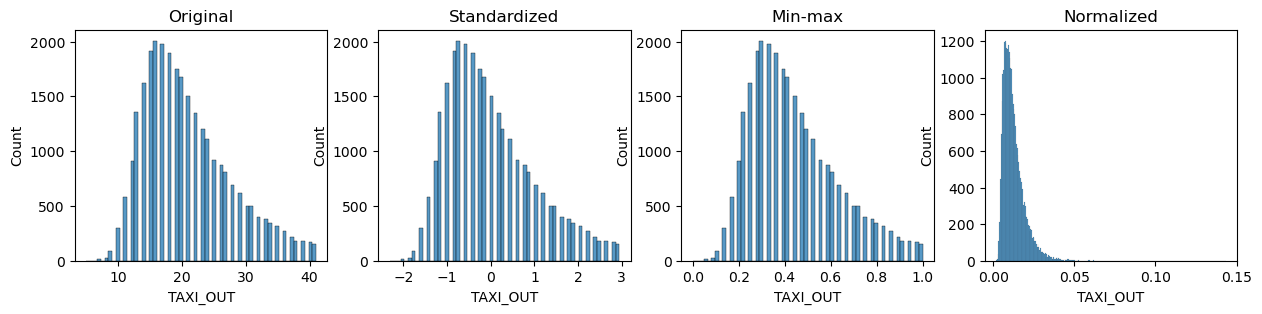

In [34]:
for col in cols:
    fig,axes = plt.subplots(1,4, figsize=(15,3))
    sns.histplot(dfs[0][col], ax=axes[0])
    axes[0].set_title('Original')
    sns.histplot(dfs[1][col], ax=axes[1])
    axes[1].set_title('Standardized')
    sns.histplot(dfs[2][col], ax=axes[2])
    axes[2].set_title('Min-max')
    sns.histplot(dfs[3][col], ax=axes[3])
    axes[3].set_title('Normalized')
    plt.show()

In [36]:
#creamos nuestro dataframe final usando el estandarizado.
data_final = pd.concat([x_standardized , X_cat , df['DELAY_STATUS']], axis =1)
data_final

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,DEST,Condition,DELAY_STATUS
0,0.622243,-1.716615,0.499202,-0.847784,-0.710402,-1.654133,-1.340285,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.001041,CHS,Fair / Windy,0
1,0.622243,-1.716615,0.499202,1.219484,1.357427,-1.621436,-1.099959,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-0.855057,LAX,Fair / Windy,0
2,0.622243,-1.716615,0.499202,-0.370722,-0.223523,-1.595279,-1.241838,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,0.166829,FLL,Fair / Windy,1
3,0.622243,-1.716615,0.499202,-0.479526,-0.364077,-1.588739,-1.152078,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.293008,MCO,Fair / Windy,0
4,0.622243,-1.716615,0.499202,-0.722242,-0.570972,-1.546233,-1.192615,0.560651,0.128137,0.011385,1.858498,2.478788,-0.615933,-2.322987,-1.383478,-1.147024,ATL,Fair / Windy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,-1.381086,1.711840,0.499202,-1.408541,-1.256875,1.775772,1.494401,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.166328,0.431822,-0.271122,ORH,Cloudy,1
28814,-1.381086,1.711840,0.499202,-1.257890,-1.215271,1.841166,-2.565078,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.166829,BOS,Cloudy,1
28815,-1.381086,1.711840,0.499202,1.395244,1.297832,1.893481,1.233806,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.020845,SEA,Cloudy,1
28816,-1.381086,1.711840,0.499202,-0.010833,0.371301,1.939257,-1.881742,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,-1.147024,SJU,Cloudy,1


In [37]:
data_final.to_csv('final_vuelos.csv', index=False)